# TPC2 - Cadeias de Markov

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio. 
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual. 
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas. 
* É preferível fazer menos e fazer bem que muito e mal. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpmath import mp
from scipy import linalg
import time
from scipy.stats import norm, maxwell
from scipy import integrate
%matplotlib inline

## Pergunta 1
***Partícula num potencial:*** 
Considere uma partícula que se move
num potencial de energia livre dependente da posição dado por 
\begin{equation}
V_{\beta}(x)=x^{4}-2(\beta-1)x^{2}
\end{equation}
supondo que a partícula está em contacto térmico com um reservatório
de calor caracterizado por $\beta$ (inverso da temperatura) e a distribuição
de probabilidade da partícula estar numa dada posição é dada por 
\begin{equation}
\rho_{\beta}(x)=\frac{e^{-\beta V_{\beta}(x)}}{Z(\beta)}
\end{equation}
onde $Z(\beta)$ é a função de partição do sistema.

1. Considere o passeio aleatório especial: A variável $x$ é discreta
e toma valores $x_{n}=0.04n$ com $n\in\mathbb{Z}$. Em cada tempo
o caminhante decide se tenta saltar para a direita ($\Delta x=0.04$)
ou para esquerda ($\Delta x=-0.04$) com probabilidade $1/2$ e aceita
a proposta com 
\begin{equation}
p_{A}(x(t-1)\to x(t-1)+\Delta x)=\min\left(1,e^{-\beta\left(V_{\beta}(x(t-1)+\Delta x)-V_{\beta}(x(t-1))\right)}\right)
\end{equation}
Se aceitou a sua variável $x$ altera-se para $x+\Delta x$, caso
contrário, fica no mesmo valor de $x$. 

$\qquad$a) Escreva uma função que implementa este algoritmo durante um tempo $t$ partindo de uma posição inicial (devolve o valor de $x$ ao fim desse tempo).

Responda Aqui

In [7]:
def RandomWalk(M,beta,T,start):
    '''Dado um número M de simulações e um tempo T, retorna uma matriz cujas linhas representam a
    evolução temporal de cada caminhante com posição inicial x0=start (Para Deltax=0.04 e p=0.5)'''
    RW_Matrix=np.zeros((M,T))
    x=np.full(M,start)
    for t in range(1,T):
        Deltax=np.sign(np.random.random(M)-0.5)*0.04
        pA=np.minimum(1,np.exp(-beta*(((x+Deltax)**4-2*(beta-1)*(x+Deltax)**2)-(x**4-2*(beta-1)*x**2))))
        accept=np.where(np.random.random(M)<pA,1,0)
        xEvolved=accept*Deltax+x
        RW_Matrix[:,t]=xEvolved
        x=xEvolved
    return RW_Matrix

$\qquad$ b) Escreva uma matriz de Markov que representa este algoritmo limitando a variável de posição ao intervalo $x\in[-2,2]$ - Sempre que uma proposta tentar sair do intervalo recusa.

Responda Aqui

In [167]:
def pA(x,beta,Deltax):
    return min(1,np.exp(-beta*(((x+Deltax)**4-2*(beta-1)*(x+Deltax)**2)-(x**4-2*(beta-1)*x**2))))

def Markov(beta):
    xs=np.linspace(-2,2,101)
    dims = (101,101)
    Omega=np.zeros(dims,float)
    
    for i,x in enumerate(xs):
        right=pA(x,beta,0.04)
        left=pA(x,beta,-0.04)
        if i==0:
            left=0
        if i==100:
            right=0
        Omega[i,i]= 1-0.5*(right+left)
        if i>0:
            Omega[i-1,i]=0.5*left
        if i<100:
            Omega[i+1,i]=0.5*right
    return Omega

def CheckMarkov(Omega):
    for i in range(101):
        if int(np.sum(Omega[:,i]))!=1:
            return False
    return True

Omega=Markov(1.4)
print(CheckMarkov(Omega))

True


2. Para $\beta=1.4$

$\qquad$ a) Escolha um valor de $x_{0}=0$ para o seu caminhante no instante inicial
$t=0$. 

Responda Aqui

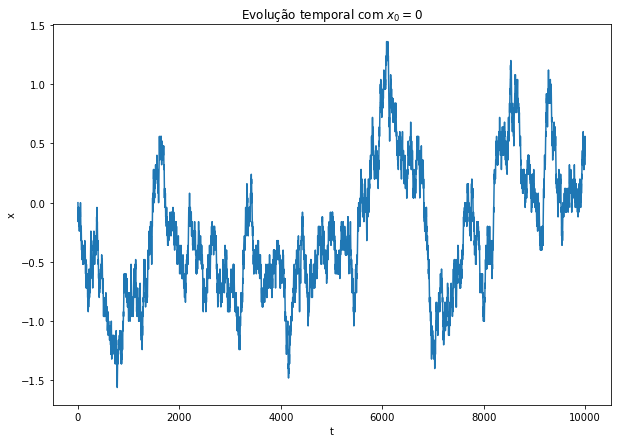

Posição final: 0.4000000000000001
Tempo de execução: 0.2479994297027588


In [14]:
beta=1.4
start = 0

positions= RandomWalk(1,beta,10000,start)[0]
plt.figure(figsize=[10,7])
plt.plot(positions)
plt.title("Evolução temporal com $x_0=0$")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

print("Posição final:",positions[-1])

$\qquad$ b) Evolua a distribuição de probabilidades durante um tempo $t=1,4,16,64,256,512$ e represente a distribuição de probabilidade da simulação para esses instantes.

Responda Aqui

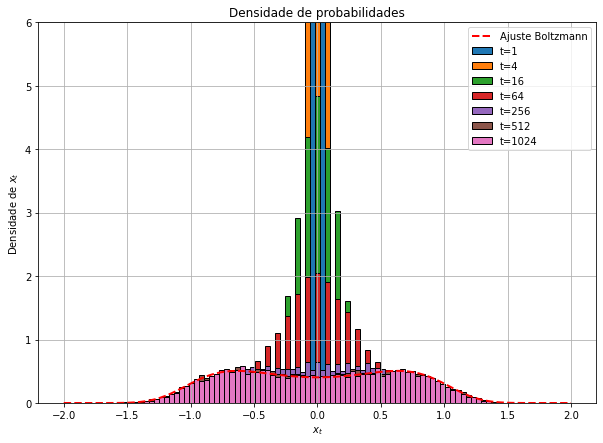

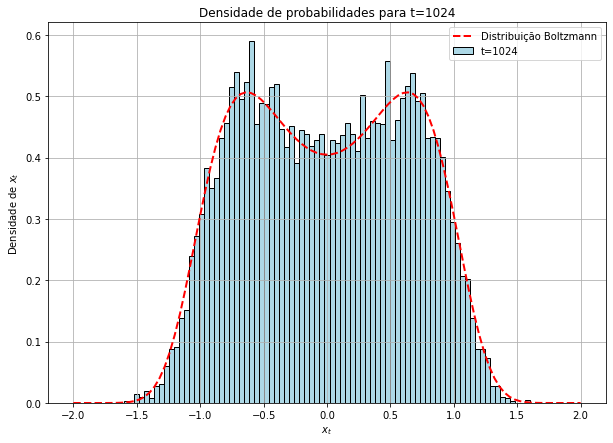

In [232]:
ts=np.array([1,4,16,64,256,512,1024])
M=10000
start=0
beta=1.4
xs=np.linspace(-2,2,101)

RW_Matrix=RandomWalk(M,beta,ts[-1]+1,start)

plt.figure(figsize=[10,7])
for t in ts:
    plt.hist(RW_Matrix[:,t],label="t="+str(t),bins=101,range=[-2,2],density=True,edgecolor="black")

Boltz=np.exp(-beta*(xs**4-2*(beta-1)*xs**2))
Boltz/=integrate.trapezoid(Boltz,dx=0.04)
plt.plot(xs,Boltz, 'r--', linewidth=2,label="Ajuste Boltzmann")

plt.title("Densidade de probabilidades")
plt.xlabel("$x_{t}$")
plt.ylabel("Densidade de $x_{t}$")
plt.ylim(0,6)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=[10,7])
plt.hist(RW_Matrix[:,ts[-1]],label="t="+str(ts[-1]),bins=101,range=[-2,2],density=True, color = "lightblue",edgecolor="black")
plt.plot(xs,Boltz, 'r--', linewidth=2,label="Distribuição Boltzmann")
plt.title("Densidade de probabilidades para t=1024")
plt.xlabel("$x_{t}$")
plt.ylabel("Densidade de $x_{t}$")
plt.legend()
plt.grid(True)
plt.show()

$\qquad$ c) Calcule a matriz de Markov que obteve em 1.b) e calcule para cada
um destes tempos calcule e represente, 
\begin{equation}
\sum_{j}[\Omega^{t}]_{ij}P_{j}(0)
\end{equation}
Será que a matriz de Markov representa exactamente o algoritmo implementado? 

Responda Aqui

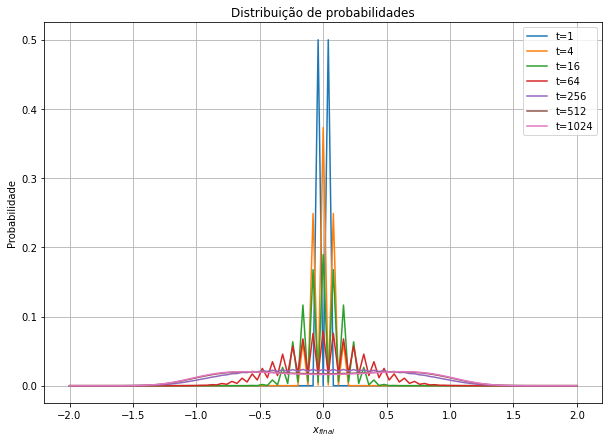

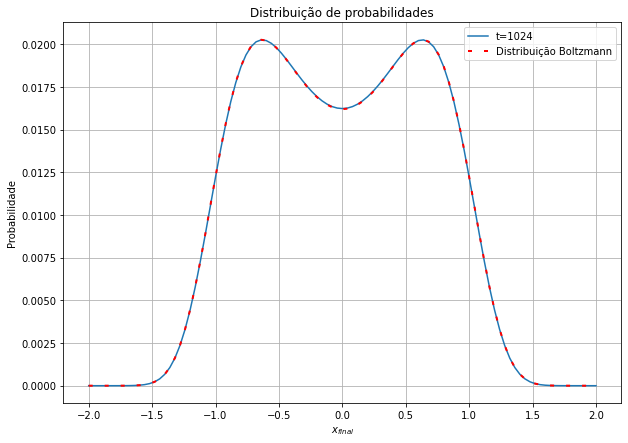

In [233]:
Pinicial=np.zeros(101)
Pinicial[50]=1
xs=np.linspace(-2,2,101)
ts=np.array([1,4,16,64,256,512,1024])
Omega=Markov(1.4)

plt.figure(figsize=[10,7])
for t in ts:
    Omegat=np.linalg.matrix_power(Omega, t)
    plt.plot(xs,np.matmul(Omegat,Pinicial),label="t="+str(t))
plt.title("Distribuição de probabilidades")
plt.xlabel("$x_{final}$")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=[10,7])
plt.plot(xs,np.matmul(Omegat,Pinicial),label="t="+str(t))
plt.plot(xs,Boltz*0.02/0.5, 'r--', linewidth=2,label="Distribuição Boltzmann",dashes=(2, 6))
plt.title("Distribuição de probabilidades")
plt.xlabel("$x_{final}$")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()

$\qquad $d) Para a matrix de Markov calculada em 1.b) obtenha o espectro de valores
próprios e os vectores próprios à direita e à esquerda usando os módulos
de python ( por exemplo $scipy.linalg.eig$ ou o $mpmath.eig$ se precisar
de maior precisão). Garanta que os vectores estão normalizados e são
ortogonais:
\begin{equation}
\sum_{i}l_{i}^{(n)}r_{i}^{(m)}=\delta_{mn}
\end{equation}
onde $m$ e $n$ são índices dos valores próprios, $r_{i}^{(n)}$
é o vector próprio à direita e $l_{i}^{(n)}$ p vector próprio à esquerda
($i$ são os indices do espaço de eventos). Verifique que para cada
tempo considerado a distribuição de probabilidade é dada por 
\begin{equation}
P_{i}(t)=\sum_{n}\lambda_{n}^{t}a_{n}r_{i}^{(n)}
\end{equation}
onde $a_{n}=\sum_{i}l_{i}^{(n)}P_{i}(0)$.

$\qquad$ i) Quantos valores próprios $\lambda=1$ obtém?

Responda Aqui

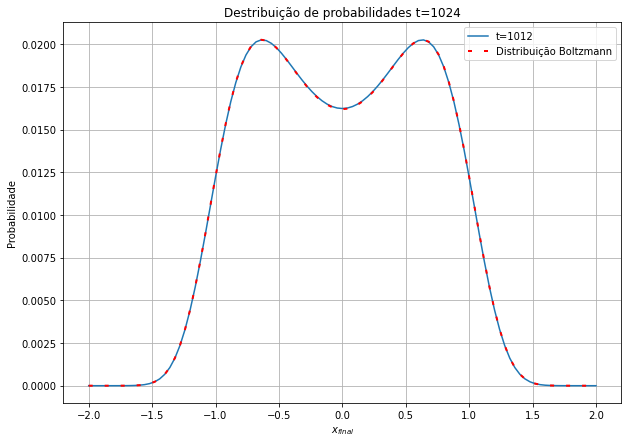

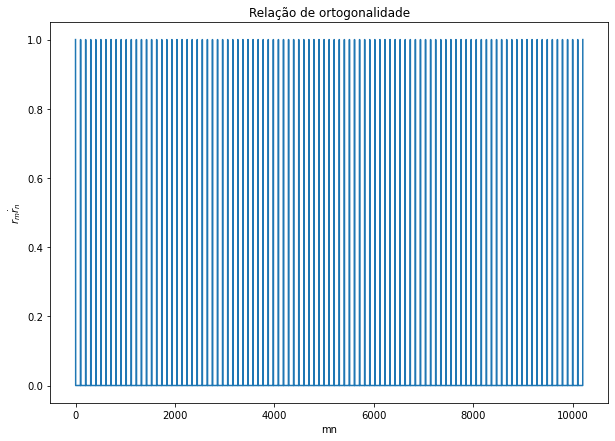

Único autovalor a uma tolerância de 10^(-5) de 1: 1.000000000000003


In [234]:
def index(x):
    return int(np.round((2+x)/0.04))

def Eigen_Time_Evo(beta,start,t):
    xs=np.linspace(-2,2,101)
    Omega=Markov(beta)
    
    Pinicial=np.zeros(101)
    Pinicial[index(start)]=1
    
    E, EL, ER = linalg.eig(Omega,left = True, right = True)
    E=np.real(E)
    
    for i in range(len(EL)):
        EL[:,i]/=np.inner(ER[:,i],EL[:,i])
        
    Pt=np.matmul((((np.matmul(EL.T,Pinicial))*np.real(E)**t)),ER.T)
    
    return Pt ,E , ER, EL
      
Pt, E ,ER, EL = Eigen_Time_Evo(1.4,0,t=1012)
plt.figure(figsize=[10,7])
plt.plot(xs,np.real(Pt),label="t=1012")
plt.plot(xs,Boltz*0.02/0.5, 'r--', linewidth=2,label="Distribuição Boltzmann",dashes=(2, 6))
plt.title("Destribuição de probabilidades t="+str(t))
plt.xlabel("$x_{final}$")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()   

Ortogonal=np.matrix.flatten(ER.T@EL )
plt.figure(figsize=[10,7])
plt.plot(np.real(Ortogonal))
plt.title("Relação de ortogonalidade")
plt.xlabel("mn")
plt.ylabel("$ r_m \dot r_n$")
plt.show()   

for i,eigen in enumerate(E):
    if abs(eigen-1)<10**(-5):
        print("Único autovalor a uma tolerância de 10^(-5) de 1:",eigen)

$\qquad$ ii.) Será que a partir do espectro de valores próprios posso “advinhar ” a escala de tempo que a dinâmica demora a equilibrar? Como poderei obter esta escala? (Lembre-se que o módulo dos valores próprios é sempre menor ou igual a 1).

Responda Aqui

Estimativa de tempo característico: 650


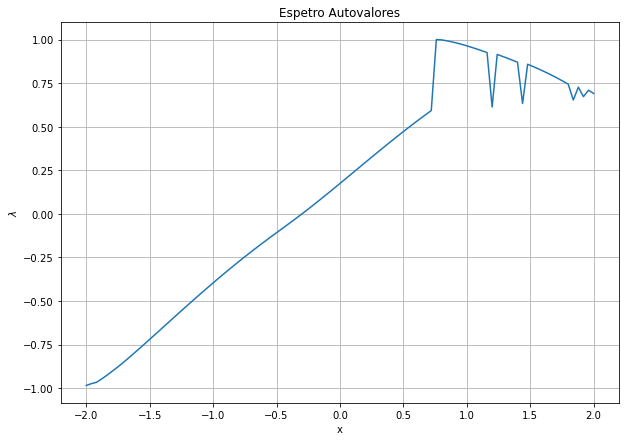

In [227]:
def Tau(beta):
    Omega=Markov(beta)
    
    E, EL, ER = linalg.eig(Omega,left = True, right = True)
    
    E_Sorted=np.sort(abs(E))
    E_Sorted[100]=0
    
    tau=-1/np.log(np.amax(abs(E_Sorted))) 
    return int(tau)

beta=1.4

tau=Tau(beta)
print("Estimativa de tempo característico:",tau)

xs=np.linspace(-2,2,101)
plt.figure(figsize=[10,7])
Pt, E ,ER, EL = Eigen_Time_Evo(beta,0,t=tau)
plt.plot(xs,np.real(E))
plt.title("Espetro Autovalores")
plt.xlabel("x")
plt.ylabel("$\lambda$")
plt.grid(True)
plt.show()  

$\qquad$ e) Para $\beta=2.4$ existem muitas diferenças com a posição inicial
quando a simulação inicia em $x=0,x=-1.5$ ou $x=1.5$: Existe apenas
uma distribuição de equilíbrio mas dependendo da distribuição inicial
pode demorar muito ($x=\pm1.5$ ) ou pouco ($x=0$) tempo a ser atingida.
À luz do espectro de valores próprios do sistema como posso entender este fenómeno?

Responda Aqui

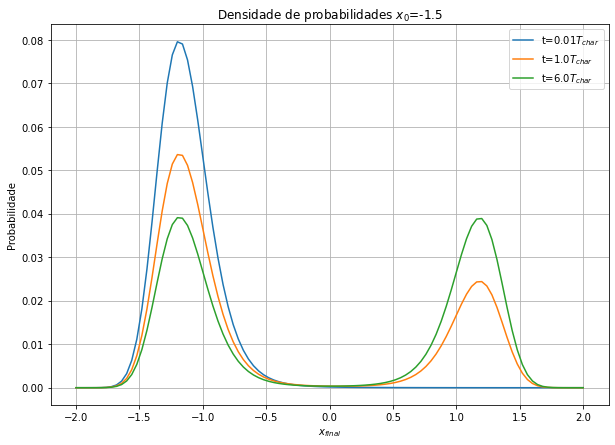

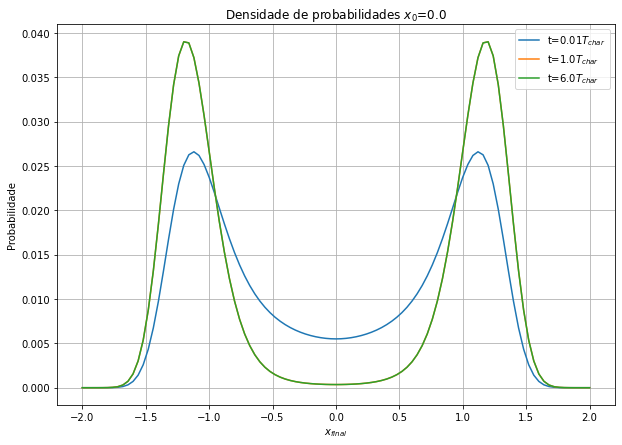

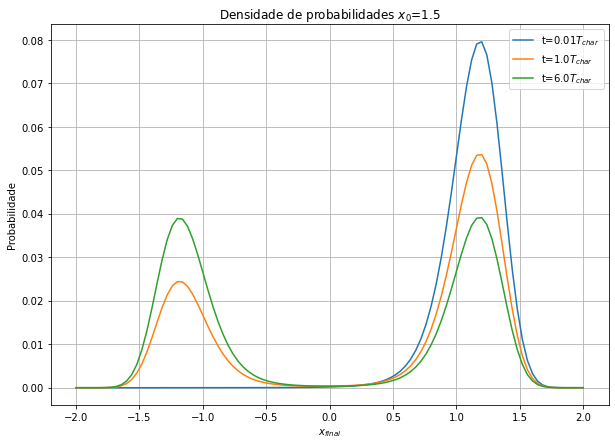

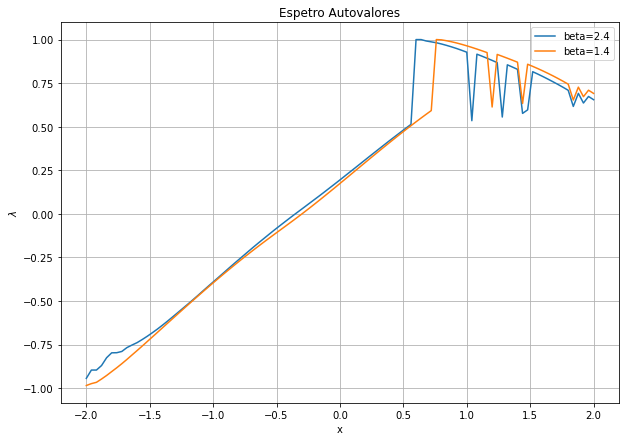

In [235]:
beta2=2.4
xs=np.linspace(-2,2,101)
xstart=np.array([-1.5,0,1.5])
tau=Tau(beta2)
Tau_Mult=np.array([0.01,1,6])
for start in xstart:
    plt.figure(figsize=[10,7])
    for mult in Tau_Mult:
        Pt, E ,ER, EL = Eigen_Time_Evo(beta2,start,int(mult*tau))
        plt.plot(xs, Pt, label=f"t=${mult}T_{{char}}$")
    plt.title("Densidade de probabilidades $x_0$="+str(start))
    plt.xlabel("$x_{final}$")
    plt.ylabel("Probabilidade")
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=[10,7])
plt.plot(xs,E,label="beta=2.4")
Pt, E ,ER, EL = Eigen_Time_Evo(beta,0,5*int(tau))
plt.plot(xs,E,label="beta=1.4")
plt.title("Espetro Autovalores")
plt.xlabel("x")
plt.ylabel("$\lambda$")
plt.grid(True)
plt.legend()
plt.show()  


## Pergunta 2

**Correlações:** Para $\beta=2$ o valor médio da posição é nulo.
Sabemos que para um determinado tempo, a distribuição de probabilidade
deixa de depender do tempo e torna-se a distribuição assimptótica
(igual para todos os tempos seguintes). Se construirmos uma amostra
de $T$ valores a partir da sequência visitada pelo passeio aleatório
para tempos superiores ao tempo de equilíbrio ($\tau$), a distribuição
de probabilidade de cada um dos valores é igual à distribuição assimptótica.
Logo o valor médio desta amostra tenderá para o valor exacto (zero),

\begin{equation}
\lim_{T\to+\infty}\frac{1}{T}\sum_{t=0}^{T-1}x(\tau+t)=0.
\end{equation}

O teorema do limite central diz-nos que o erro da medida com $T$
medições deverá ser da ordem de 
\begin{equation}
Erro(T)=\frac{\sigma}{\sqrt{T}}
\end{equation}

onde $\sigma$ é o desvio padrão de uma única medição. 

1) Estime o valor do erro do valor médio ($\langle x\rangle=0$) obtido $T$ medições consecutivas através de 
    \begin{align*}
    \overline{x}_{T}(k) & =\frac{1}{T}\sum_{t=0}^{T-1}x_{k}(\tau+t)\\
    Erro(T) & =\frac{1}{M}\sum_{k=0}^{M-1}(\overline{x}_{T}(k)-\left\langle x\right\rangle )^{2}
    \end{align*}
onde $\overline{x}_{T}(k)$ é o estimador do valor médio obtido na simulação $k$ medindo $T$ valores de posição consecutivos a partir de $t>\tau$ onde $\tau$ é um tempo maior do que o necessário para atingir o equilíbrio. O erro é o valor médio do desvio de cada estimador em relação ao valor exacto em $M$ simulações independentes.

Responda Aqui

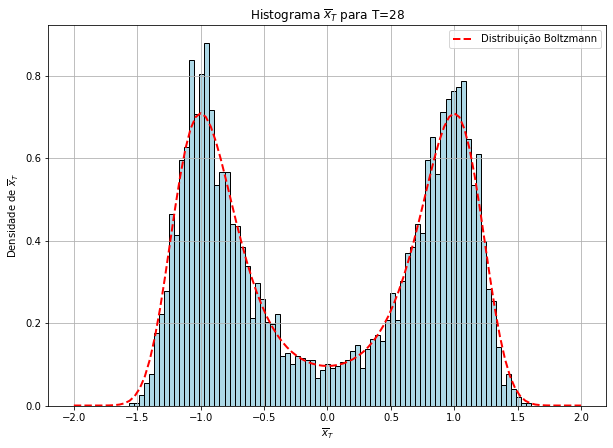

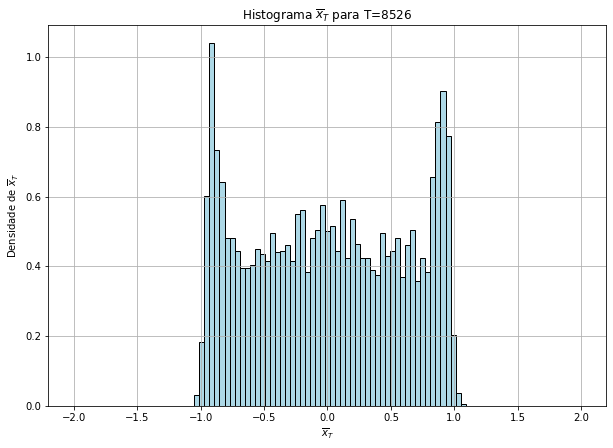

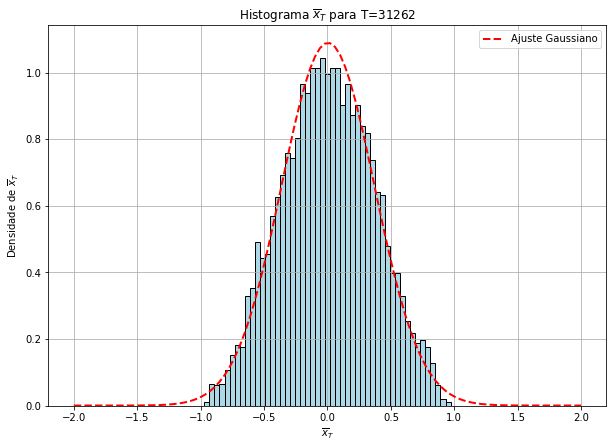

Tempo de execução: 16.966655015945435


In [231]:
tt=Tau(2)
M=5000
start=0
beta=2
xs=np.linspace(-2,2,101)
ts=np.array([tt//100,3*tt,11*tt])

start_time = time.time()

RW_Matrix=RandomWalk(M,beta,(tt+ts)[-1],start)

for i,t in enumerate((tt+ts)):
    RW_Matrixts=RW_Matrix[:,tt:t]
    
    medias=[row.mean(axis=0) for row in RW_Matrixts]
    Media=np.mean(medias)
    Erro=np.average((medias-Media)**2)

    plt.figure(figsize=[10,7])
    n, bins, patches = plt.hist(medias,bins=101,range=[-2,2],density=True, color = "lightblue",edgecolor="black")
    plt.title("Histograma $\overline{x}_T$ para T="+str(t-tt))
    plt.xlabel("$\overline{x}_{T}$")
    plt.ylabel("Densidade de $\overline{x}_{T}$")
    
    if i==0:
        Boltz2=np.exp(-beta*(xs**4-2*(beta-1)*xs**2))
        Boltz2/=integrate.trapezoid(Boltz,dx=0.04)
        plt.plot(xs,Boltz, 'r--', linewidth=2,label="Distribuição Boltzmann")
        plt.legend()
        
    if i==2:
        params = norm.fit(medias)
        y = norm.pdf( bins,*params)
        plt.plot(bins, y, 'r--', linewidth=2,label="Ajuste Gaussiano")
        plt.legend()
        
    plt.grid(True)
    plt.show()
    
end_time = time.time()
final_time = end_time - start_time
print("Tempo de execução:",final_time)

2. Note que pode estimar o desvio padrão de uma medida calculando o valor
médio 
\begin{equation}
\sigma\approx\sqrt{\frac{1}{M}\sum_{k=0}^{M-1}x_{k}^{2}(\tau)}
\end{equation}
a dispersão do ponto inicial. Será que a lei eq: \ref{eq:erro} é
verificada? Represente como função de $T$ a sua estimativa do erro
($T=1,2,4,16,64,256,1024$). Comente o resultado. 

Responda Aqui

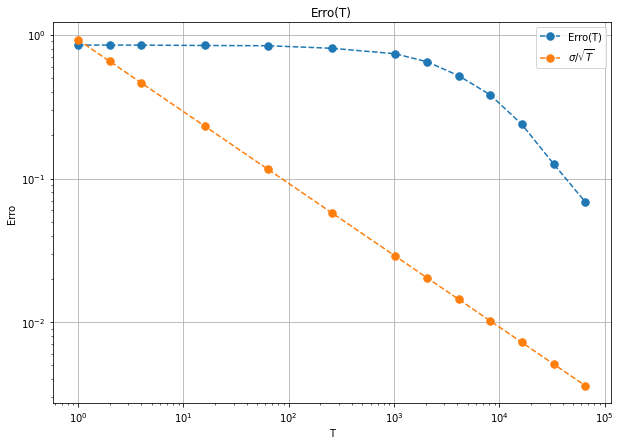

Tempo de execução: 7.724698305130005


In [236]:
start_time=time.time()

tt=Tau(2)
M=1000
start=0
beta=2

RW_Matrix=RandomWalk(M,beta,tt,start)
std=np.sqrt(np.mean((RW_Matrix[:,-1])**2))

Ts=np.array([1,2,4,16,64,256,1024,2048,4096,8192,16384,32768,65536])
Erro=np.zeros(len(Ts))

RW_Matrix=RandomWalk(M,beta,tt+Ts[-1],start)
for i,t in enumerate(Ts):
    RW_Matrixts=RW_Matrix[:,tt:t+tt]
    medias=[row.mean(axis=0) for row in RW_Matrixts]
    
    Media=np.mean(medias)
    Erro[i]=np.average((medias-Media)**2)

plt.figure(figsize=[10,7])
plt.title("Erro(T)")
plt.xlabel("T")
plt.ylabel("Erro")
plt.plot(Ts,Erro,".--",label="Erro(T)", markersize=15)
plt.plot(Ts,std/(np.sqrt(Ts)),".--",label="$\sigma /\sqrt{T}$", markersize=15)
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

end_time = time.time()
final_time = end_time - start_time
print("Tempo de execução:",final_time)

### Bom Trabalho